In [1]:
from dataclasses import dataclass
import pandas as pd

In [2]:
@dataclass
class ModelInputs:
    starting_salary: int = 60000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    desired_cash: int = 1500000
        
model_data = ModelInputs()
model_data            

ModelInputs(starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000)

In [3]:
def salary_at_year(data: ModelInputs, year):
    """
    Gets the salary at a given year from the start of the model based on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and taking out the decimals gets the number of promotions
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise) ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [4]:
for i in range(6):
    year = i + 1
    salary = salary_at_year(model_data, year)
    print(f'The salary at year {year} is ${salary:,.0f}.')

The salary at year 1 is $61,200.
The salary at year 2 is $62,424.
The salary at year 3 is $63,672.
The salary at year 4 is $64,946.
The salary at year 5 is $76,182.
The salary at year 6 is $77,705.


In [5]:
year=3
def cash_saved_during_year(model_data,year):
    salary= salary_at_year(model_data,year)
    cash_saved=salary*model_data.savings_rate
    return cash_saved
cash_saved_during_year(model_data,5)

19045.3938552

In [6]:
def wealth_at_year(data,year,prior_wealth):
    cash_saved = cash_saved_during_year(data,year)
    wealth = prior_wealth*(1 + data.interest_rate) + cash_saved
    return wealth

In [7]:
prior_wealth = 0
for i in range(6):
    year = i+1
    wealth = wealth_at_year(model_data,year,prior_wealth)
    print(f'The wealth at year {year} is ${wealth:.0f}.')
    
    prior_wealth = wealth

The wealth at year 1 is $15300.
The wealth at year 2 is $31671.
The wealth at year 3 is $49173.
The wealth at year 4 is $67868.
The wealth at year 5 is $90307.
The wealth at year 6 is $114248.


In [8]:
def years_to_retirement(data: ModelInputs):
    
    # starting with no cash saved
    prior_wealth = 0  
    wealth = 0
    
    year = 0  # will become 1 on first loop
    
    print('Wealths over time:') # \n makes a blank line in the output.
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_at_year(model_data, year, prior_wealth)
        print(f'The wealth at year {year} is ${wealth:,.0f}.')

        # Set next year's prior wealth to this year's wealth
        prior_wealth = wealth
        
    # Now we have exited the while loop, so wealth must be >= desired_cash. Whatever last year was set
    # is the years to retirement.
    print(f'\nRetirement:\nIt will take {year} years to retire.')  # \n makes a blank line in the output.
    return year

In [9]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.
The wealth at year 7 is $139,775.
The wealth at year 8 is $166,975.
The wealth at year 9 is $195,939.
The wealth at year 10 is $229,918.
The wealth at year 11 is $266,080.
The wealth at year 12 is $304,542.
The wealth at year 13 is $345,431.
The wealth at year 14 is $388,878.
The wealth at year 15 is $439,025.
The wealth at year 16 is $492,294.
The wealth at year 17 is $548,853.
The wealth at year 18 is $608,878.
The wealth at year 19 is $672,557.
The wealth at year 20 is $745,168.
The wealth at year 21 is $822,190.
The wealth at year 22 is $903,859.
The wealth at year 23 is $990,422.
The wealth at year 24 is $1,082,140.
The wealth at year 25 is $1,185,745.
The wealth at year 26 is $1,295,520.
The wealth at year 27 is $1,411,793.
The wealth at year 28 is $1,534,910.

Reti

In [10]:
prior_wealth = 0
wealth =0


year=0
df_data_tups=[]

while wealth < model_data.desired_cash:
    year = year + 1
    salary=salary_at_year(model_data,year)
    wealth = wealth_at_year(model_data,year,prior_wealth)
    
    prior_wealth = wealth
    df_data_tups.append((year,salary,wealth))

df_data_tups

[(1, 61200.0, 15300.0),
 (2, 62424.0, 31671.0),
 (3, 63672.48000000001, 49172.670000000006),
 (4, 64945.929599999996, 67867.7859),
 (5, 76181.5754208, 90306.5690502),
 (6, 77705.206929216, 114248.199235014),
 (7, 79259.31106780033, 139775.43696371478),
 (8, 80844.49728915634, 166975.3331341896),
 (9, 82461.38723493945, 195939.44659963396),
 (10, 96727.20722658397, 229918.22073626166),
 (11, 98661.75137111566, 266079.56961585366),
 (12, 100634.98639853796, 304542.29469628085),
 (13, 102647.68612650874, 345431.3309627221),
 (14, 104700.63984903891, 388878.05747311795),
 (15, 122813.85054292264, 439025.42298250453),
 (16, 125270.12755378109, 492294.22602007503),
 (17, 127775.53010485673, 548852.819847293),
 (18, 130331.04070695386, 608878.2210163962),
 (19, 132937.66152109293, 672556.5474474892),
 (20, 155935.876964242, 745168.3440609243),
 (21, 159054.59450352684, 822190.4098898523),
 (22, 162235.68639359737, 903858.8519827442),
 (23, 165480.40012146934, 990421.8946122488),
 (24, 168790.

In [11]:
df=pd.DataFrame(df_data_tups,columns=['Year','Salary','Wealth'])
df

,Year,Salary,Wealth
0,1,61200.000000,1.530000e+04
1,2,62424.000000,3.167100e+04
2,3,63672.480000,4.917267e+04
3,4,64945.929600,6.786779e+04
4,5,76181.575421,9.030657e+04
5,6,77705.206929,1.142482e+05
6,7,79259.311068,1.397754e+05
7,8,80844.497289,1.669753e+05
8,9,82461.387235,1.959394e+05
9,10,96727.207227,2.299182e+05


In [12]:
df.style.format({
    'Salary': '${:,.0f}',
    'Wealth': '${:,.0f}',
})

,Year,Salary,Wealth
0,1,"$61,200","$15,300"
1,2,"$62,424","$31,671"
2,3,"$63,672","$49,173"
3,4,"$64,946","$67,868"
4,5,"$76,182","$90,307"
5,6,"$77,705","$114,248"
6,7,"$79,259","$139,775"
7,8,"$80,844","$166,975"
8,9,"$82,461","$195,939"
9,10,"$96,727","$229,918"


In [13]:
df.style.format({
    'Salary': '${:,.0f}',
    'Wealth': '${:,.0f}',
}).bar(subset=['Salary','Wealth']).hide_index()

Year,Salary,Wealth
1,"$61,200","$15,300"
2,"$62,424","$31,671"
3,"$63,672","$49,173"
4,"$64,946","$67,868"
5,"$76,182","$90,307"
6,"$77,705","$114,248"
7,"$79,259","$139,775"
8,"$80,844","$166,975"
9,"$82,461","$195,939"
10,"$96,727","$229,918"


In [14]:
def style_salaries_wealths_df(df):
    return df.style.format({
        'Salary': '${:,.0f}',
        'Wealth': '${:,.0f}',
    }).bar(subset=['Salary','Wealth']).hide_index()

In [15]:
def get_salaries_wealths(data):
    """
    Runs the retirement model, collecting salary and wealth information year by year and storing
    into a DataFrame for further analysis.
    """
    # starting with no cash saved
    prior_wealth = 0  
    wealth = 0
    
    year = 0  # will become 1 on first loop
    
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(model_data, year, prior_wealth)

        # Set next year's prior wealth to this year's wealth
        prior_wealth = wealth
        
        # Save the results in a tuple for later building the DataFrame
        df_data_tups.append((year, salary, wealth))
        
    # Now we have exited the while loop, so wealth must be >= desired_cash
    
    # Now create the DataFrame
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [16]:
df = get_salaries_wealths(model_data)
style_salaries_wealths_df(df)

Year,Salary,Wealth
1,"$61,200","$15,300"
2,"$62,424","$31,671"
3,"$63,672","$49,173"
4,"$64,946","$67,868"
5,"$76,182","$90,307"
6,"$77,705","$114,248"
7,"$79,259","$139,775"
8,"$80,844","$166,975"
9,"$82,461","$195,939"
10,"$96,727","$229,918"


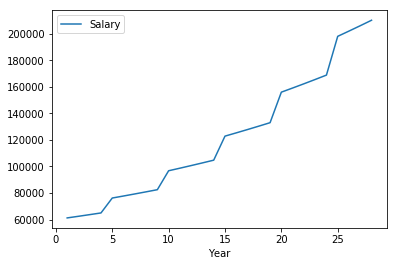

In [17]:
df.plot.line(x='Year',y='Salary')

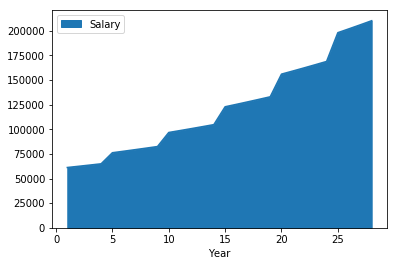

In [18]:
df.plot.area(x='Year',y='Salary')

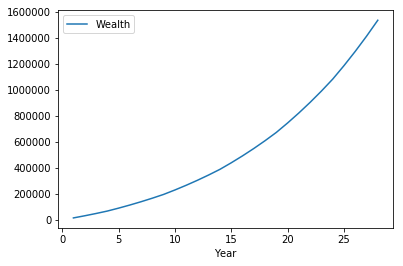

In [19]:
df.plot.line(x='Year',y='Wealth')